# MIMIC-II IAC

In [1]:
import ehrapy.api as ep
import seaborn as sns
import matplotlib.pyplot as plt
import cellrank as cr
from cellrank.tl.kernels import ConnectivityKernel
import scvelo as scv

Unable to contact PyPI to check for the latest ehrapy version. Do you have an internet 
connection?

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/medcat/cat.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
adata = ep.dt.mimic_2(encoded=True)

In [3]:
ep.pp.knn_impute(adata)

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals', 'original_values_categoricals', 'var_to_encoding'
    layers: 'original'

In [4]:
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")

... storing 'service_unit' as categorical
... storing 'day_icu_intime' as categorical


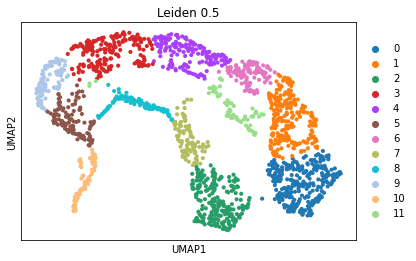

In [5]:
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

In [6]:
ck = ConnectivityKernel(adata)

In [7]:
ck.compute_transition_matrix()

<ConnectivityKernel>

In [8]:
ck.compute_projection(basis="umap")

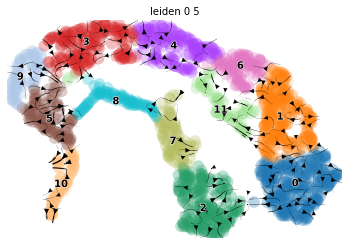

In [9]:
scv.pl.velocity_embedding_stream(adata, vkey="T_fwd", basis="umap", color="leiden_0_5")

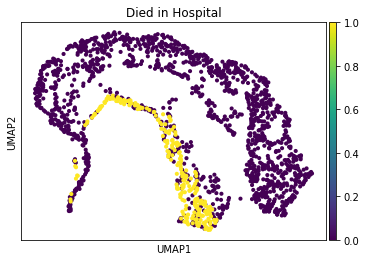

In [12]:
ep.pl.umap(adata, color="hosp_exp_flg", title="Died in Hospital")